In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("query.csv")
print(data.head())


                       time  latitude  longitude  depth  mag magType   nst  \
0  2024-03-18T01:25:01.618Z   33.5006    92.9251   10.0  4.0      mb  23.0   
1  2024-03-17T22:05:54.170Z   33.6366    93.1122   10.0  4.0      mb  31.0   
2  2024-03-14T08:27:16.234Z   38.5495    97.3148   10.0  4.7      mb  76.0   
3  2024-03-09T05:17:46.850Z   31.8953    92.7963   10.0  4.3      mb  45.0   
4  2024-03-07T10:09:15.384Z   33.3794    92.8542   10.0  5.0      mb  77.0   

     gap   dmin   rms  ...                   updated  \
0   86.0  8.695  1.09  ...  2024-03-19T03:56:13.040Z   
1   68.0  8.902  0.85  ...  2024-03-17T22:17:47.040Z   
2  101.0  5.709  0.60  ...  2024-03-14T08:42:03.040Z   
3   76.0  7.698  0.61  ...  2024-03-09T05:48:12.040Z   
4   31.0  3.950  0.64  ...  2024-03-16T05:52:36.040Z   

                           place        type horizontalError depthError  \
0     238 km NNE of Nagqu, China  earthquake           11.14      1.982   
1     259 km NNE of Nagqu, China  earthquake

In [4]:
total_rows, total_columns = data.shape

print(f'Total Rows: {total_rows}')
print(f'Total Columns: {total_columns}')
print(data.info())

Total Rows: 3213
Total Columns: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             3213 non-null   object 
 1   latitude         3213 non-null   float64
 2   longitude        3213 non-null   float64
 3   depth            3213 non-null   float64
 4   mag              3213 non-null   float64
 5   magType          3213 non-null   object 
 6   nst              1938 non-null   float64
 7   gap              3210 non-null   float64
 8   dmin             1498 non-null   float64
 9   rms              3212 non-null   float64
 10  net              3213 non-null   object 
 11  id               3213 non-null   object 
 12  updated          3213 non-null   object 
 13  place            3213 non-null   object 
 14  type             3213 non-null   object 
 15  horizontalError  1337 non-null   float64
 16  depthError       1894 non

In [ ]:
# TIME TO TIMESTAMP

data['time'] = pd.to_datetime(data['time'])
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
print(data.head())
data["time_seconds"] = pd.to_datetime(data["time"]).astype(int) // 10**9

# Display the updated DataFrame
print(data)
data = data.drop(columns=["time"])

# Display the updated DataFrame
print(data)

                              time  latitude  longitude  depth  mag magType  \
0 2019-12-25 07:04:18.790000+00:00   23.6610    96.0256  10.00  4.6      mb   
1 2019-12-22 14:59:31.805000+00:00   23.6551    94.0597  10.00  3.8      mb   
2 2019-12-19 22:16:20.980000+00:00   34.6953    79.7421  10.00  4.5      mb   
3 2019-12-19 12:07:55.485000+00:00   32.4723    86.9509  10.00  4.9      mb   
4 2019-12-18 14:09:17.268000+00:00   33.5899    71.6300  46.36  4.5      mb   

   nst    gap   dmin   rms  ...        type horizontalError depthError  \
0  NaN   64.0  1.676  0.61  ...  earthquake             7.3        1.9   
1  NaN  117.0  0.612  1.06  ...  earthquake             4.2        2.0   
2  NaN  109.0  5.466  0.75  ...  earthquake             8.7        1.9   
3  NaN   84.0  4.522  1.09  ...  earthquake             6.3        1.8   
4  NaN   91.0  1.368  0.69  ...  earthquake             6.2        6.3   

  magError magNst    status  locationSource  magSource  year month  
0    0.096 

In [5]:
null_values=data.isnull().sum();null_values

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1275
gap                   3
dmin               1715
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    1876
depthError         1319
magError           1721
magNst              210
status                0
locationSource        0
magSource             0
dtype: int64

In [6]:
missing_percentage = data.isnull().mean() * 100
print('Percentage of missing values:')
print(missing_percentage[['nst','gap','dmin','rms','place','horizontalError','depthError', 'magError','magNst']])

Percentage of missing values:
nst                39.682540
gap                 0.093371
dmin               53.376906
rms                 0.031124
place               0.000000
horizontalError    58.387800
depthError         41.051976
magError           53.563648
magNst              6.535948
dtype: float64


In [7]:
# Drop rows with missing values in 'gap' column
data.dropna(subset=['gap'], inplace=True)

# Drop rows with missing values in 'rms' column
data.dropna(subset=['rms'], inplace=True)

# Drop rows with missing values in 'rms' column
data.dropna(subset=['place'], inplace=True)

In [ ]:
# Filter rows where 'magNst' column has missing values
missing_magNst = data[data['magNst'].isnull()]

# Select the 'place' column for the filtered rows
places_with_missing_magNst = missing_magNst['place']
print(places_with_missing_magNst)


780        Xizang-Qinghai border region
824           26 km W of Chauk, Myanmar
883          89 km NE of Lobujya, Nepal
921        76 km SE of Mawlaik, Myanmar
981            29 km W of Imph?l, India
                     ...               
3079            75 km N of Jumla, Nepal
3083      Nicobar Islands, India region
3085      Nicobar Islands, India region
3109      Nicobar Islands, India region
3125    145 km SW of Bamboo Flat, India
Name: place, Length: 294, dtype: object


In [ ]:
def extract_country(place):
    if pd.notna(place) and ',' in str(place):
        return place.split(',')[1].strip()
    else:
        return str(place).strip()

data['country'] = data['place'].apply(extract_country)

print(data.head())

   latitude  longitude  depth  mag magType  nst    gap   dmin   rms net  ...  \
0   23.6610    96.0256  10.00  4.6      mb  NaN   64.0  1.676  0.61  us  ...   
1   23.6551    94.0597  10.00  3.8      mb  NaN  117.0  0.612  1.06  us  ...   
2   34.6953    79.7421  10.00  4.5      mb  NaN  109.0  5.466  0.75  us  ...   
3   32.4723    86.9509  10.00  4.9      mb  NaN   84.0  4.522  1.09  us  ...   
4   33.5899    71.6300  46.36  4.5      mb  NaN   91.0  1.368  0.69  us  ...   

  depthError magError magNst    status  locationSource  magSource  year  \
0        1.9    0.096   32.0  reviewed              us         us  2019   
1        2.0    0.511    1.0  reviewed              us         us  2019   
2        1.9    0.093   34.0  reviewed              us         us  2019   
3        1.8    0.052  116.0  reviewed              us         us  2019   
4        6.3    0.081   52.0  reviewed              us         us  2019   

   month time_seconds         country  
0     12   1577257458       

In [ ]:
data['country'].unique()

array(['Myanmar', 'India', 'western Xizang', 'Pakistan', 'India region',
       'Nepal', 'Indonesia', 'China', 'near the south coast of Myanmar',
       'Bhutan', 'Bay of Bengal', 'Bangladesh',
       'Xizang-Qinghai border region', 'Eastern Xizang', 'Afghanistan',
       'Myanmar-India border region', 'Kashmir-India border region',
       'Thailand', 'Xizang-Nepal border region',
       'Xinjiang-Xizang border region',
       'western Xizang-India border region',
       'Kashmir-Xizang border region'], dtype=object)

In [ ]:
# List of countries to keep
countries_to_keep = ['Myanmar', 'India', 'western Xizang', 'Pakistan', 'India region', 'Nepal',
                     'Indonesia', 'China', 'Bhutan', 'Bay of Bengal', 'Bangladesh', 'Afghanistan',
                     'Myanmar-India border region', 'Kashmir-India border region', 'Thailand']

# Filter rows based on the countries list
filtered_data = data[data['country'].isin(countries_to_keep)]
data=filtered_data

In [ ]:
missing_percentage = data.isnull().mean() * 100
print('Percentage of missing values:')
print(missing_percentage[['nst','dmin','horizontalError','depthError', 'magError','magNst']])

Percentage of missing values:
nst                60.819091
dmin               39.180909
horizontalError    48.210255
depthError         17.865205
magError           39.793615
magNst              9.351822
dtype: float64


In [ ]:
#removed the col nst because more than 50% missing data,removed type and status because was not imp
data.drop(['nst','type','status'],axis=1,inplace=True)
data

,latitude,longitude,depth,mag,magType,gap,dmin,rms,net,id,...,horizontalError,depthError,magError,magNst,locationSource,magSource,year,month,time_seconds,country
0,23.6610,96.0256,10.00,4.6,mb,64.0,1.676,0.61,us,us70006quh,...,7.3,1.9,0.096,32.0,us,us,2019,12,1577257458,Myanmar
1,23.6551,94.0597,10.00,3.8,mb,117.0,0.612,1.06,us,us70006x2s,...,4.2,2.0,0.511,1.0,us,us,2019,12,1577026771,Myanmar
2,34.6953,79.7421,10.00,4.5,mb,109.0,5.466,0.75,us,us70006nu2,...,8.7,1.9,0.093,34.0,us,us,2019,12,1576793780,India
3,32.4723,86.9509,10.00,4.9,mb,84.0,4.522,1.09,us,us70006nf9,...,6.3,1.8,0.052,116.0,us,us,2019,12,1576757275,western Xizang
4,33.5899,71.6300,46.36,4.5,mb,91.0,1.368,0.69,us,us60006t6q,...,6.2,6.3,0.081,52.0,us,us,2019,12,1576678157,Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,10.8290,91.7010,35.00,4.6,mb,184.2,NaN,1.22,us,usp000gnu9,...,NaN,NaN,NaN,3.0,us,us,2008,11,1226838309,India
3125,10.8330,91.7110,26.70,5.5,mwc,25.8,NaN,0.97,us,usp000gnu8,...,NaN,11.8,NaN,NaN,us,gcmt,2008,11,1226838036,India
3126,10.8440,91.7850,39.10,4.6,mb,102.9,NaN,0.82,us,usp000gnu7,...,NaN,19.0,NaN,10.0,us,us,2008,11,1226835460,India
3127,30.1080,83.4410,17.20,3.9,mb,145.4,NaN,1.38,us,usp000gnsa,...,NaN,36.9,NaN,5.0,us,us,2008,11,1226774383,Nepal


In [ ]:
#close to zero, MCAR. otherwise MAR.
for col in ['dmin', 'horizontalError', 'depthError', 'magError', 'magNst']:
    data[col + '_missing'] = data[col].isnull().astype(int)

# Check the correlation between missingness of each variable and other columns
correlation_matrix = data.corr()
print(correlation_matrix)

                         latitude  longitude     depth       mag       gap  \
latitude                 1.000000  -0.570212 -0.167939 -0.155049  0.016809   
longitude               -0.570212   1.000000  0.268347  0.155941 -0.180225   
depth                   -0.167939   0.268347  1.000000  0.013753 -0.090873   
mag                     -0.155049   0.155941  0.013753  1.000000 -0.640703   
gap                      0.016809  -0.180225 -0.090873 -0.640703  1.000000   
dmin                     0.016067  -0.121929 -0.156490 -0.015803  0.038203   
rms                      0.122330  -0.179767 -0.081445 -0.010870 -0.018299   
horizontalError         -0.134543   0.028194  0.082406 -0.226116  0.354297   
depthError              -0.104808   0.056610  0.284861 -0.136965  0.109990   
magError                -0.071563  -0.062473  0.027014 -0.598739  0.591386   
magNst                   0.094806  -0.009022 -0.038385  0.590710 -0.479044   
year                     0.122946  -0.012516 -0.030362 -0.039015

<AxesSubplot:>

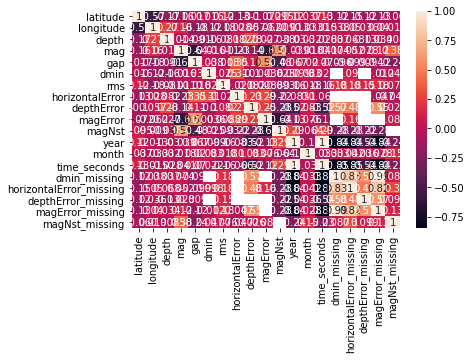

In [ ]:
#'dmin_missing' and 'magError_missing'(MCAR),
#'horizontalError_missing', 'depthError_missing', and 'magNst_missing'(MAR)
# Visualize the relationship between missingness of each variable and other columns
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
#For dmin and magError they are independent of other variables
#missingness pattern IS be closer to (MCAR)
from sklearn.impute import KNNImputer
# Select the columns 'dmin', 'magError', for imputation
impute_data = data[['dmin', 'magError']]

# Initialize the KNNImputer with the number of neighbors (k)
knn_imputer = KNNImputer(n_neighbors=55)

# Fit and transform the data to impute missing values
imputed_values = knn_imputer.fit_transform(impute_data)

# Replace the original 'dmin', 'magError', and 'depthError' columns with the imputed values
data['dmin'] = imputed_values[:, 0]
data['magError'] = imputed_values[:, 1]

# Now 'dmin' and 'magError' columns in the 'data' DataFrame will have missing values imputed using KNN


In [ ]:
#knowing that an earthquake has a high "magnst" value might give more confidence in its reported parameters. so lets compute the missing values of nst which are 1908
''' Regression imputation is suitable when there are other variables in the dataset that are correlated with "magnst". If you have predictors that are strongly associated with "magnst", regression imputation can provide more accurate estimates than simple mean imputation. However, you need to ensure that the regression model is appropriate and does not suffer from issues such as multicollinearity.'''
#since magnst is positively correlated with  mag  therefore we use regression to compute the missing values
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assuming your dataframe is named 'earthquake_data'
# Extracting rows with missing 'nst' values
missing_nst_data = data[data['magNst'].isnull()]

# Extracting rows with non-missing 'nst' values
non_missing_nst_data = data.dropna(subset=['magNst'])

# Selecting relevant features for the regression model
# You may need to choose appropriate features based on your data
features = ['latitude', 'longitude', 'depth', 'mag']

# Splitting data into features (X) and target variable (y)
X_train = non_missing_nst_data[features]
y_train = non_missing_nst_data['magNst']
X_test = missing_nst_data[features]

# Initialize and fit the regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict missing 'nst' values
predicted_nst = regression_model.predict(X_test)

# Fill missing 'nst' values with predicted values
missing_nst_data['magNst'] = predicted_nst

# Update the original dataframe with imputed values
data.update(missing_nst_data)

# Print the updated dataframe
print(data)

      latitude  longitude  depth  mag magType    gap      dmin   rms net  \
0      23.6610    96.0256  10.00  4.6      mb   64.0  1.676000  0.61  us   
1      23.6551    94.0597  10.00  3.8      mb  117.0  0.612000  1.06  us   
2      34.6953    79.7421  10.00  4.5      mb  109.0  5.466000  0.75  us   
3      32.4723    86.9509  10.00  4.9      mb   84.0  4.522000  1.09  us   
4      33.5899    71.6300  46.36  4.5      mb   91.0  1.368000  0.69  us   
...        ...        ...    ...  ...     ...    ...       ...   ...  ..   
3124   10.8290    91.7010  35.00  4.6      mb  184.2  2.899764  1.22  us   
3125   10.8330    91.7110  26.70  5.5     mwc   25.8  2.899764  0.97  us   
3126   10.8440    91.7850  39.10  4.6      mb  102.9  2.899764  0.82  us   
3127   30.1080    83.4410  17.20  3.9      mb  145.4  2.899764  1.38  us   
3128   12.9260    93.2870  35.00  3.8      mb  197.3  2.899764  0.77  us   

              id  ... magSource    year  month  time_seconds         country  \
0     u

<ipython-input-388-0b6ad7382511>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_nst_data['magNst'] = predicted_nst


In [ ]:
import pandas as pd
import numpy as np

# Function to calculate Haversine distance between two sets of latitude and longitude
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    distance = R * c
    return distance

# Calculate average depthError for non-missing values
avg_depth_error = data['depthError'].mean()

# Calculate missing values for depthError using Haversine formula
for index, row in data.iterrows():
    if pd.isnull(row['depthError']):
        d_error = haversine(row['latitude'], row['longitude'], row['latitude'], row['longitude'])
        data.at[index, 'depthError'] = avg_depth_error if np.isnan(d_error) else d_error

In [ ]:
data.drop(['net','locationSource','dmin_missing' ,'horizontalError_missing' ,'depthError_missing' ,'magError_missing','magNst_missing','horizontalError','updated','magSource'],axis=1,inplace=True)

In [ ]:
null_values=data.isnull().sum();null_values

latitude        0
longitude       0
depth           0
mag             0
magType         0
gap             0
dmin            0
rms             0
id              0
place           0
depthError      0
magError        0
magNst          0
year            0
month           0
time_seconds    0
country         0
dtype: int64

In [ ]:
# Save the updated dataset in an Excel CSV file
data.to_csv('cleaned_dataset.csv', index=False)